In [104]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [105]:
# Initialize empty lists to store input features and target values
X, Ylist = [], []

# Randomly initialize weights for a linear model
w_1 = np.random.randint(-1, 1) + np.random.rand()
w_2 = np.random.randint(-1, 1) + np.random.rand()

# Generate 1000 data points
for i in range(1000):
    # Generate two input features with small random values 
    x_1 = np.random.randint(-1, 1) + np.random.rand()
    x_2 = np.random.randint(-1, 1) + np.random.rand()
    
    # Compute the target value using a simple linear combination
    Y = x_1 * w_1 + x_2 * w_2
    
    # Append the input features and target value to their respective lists
    X.append([x_1, x_2])
    Ylist.append(Y)
X = np.array(X)
Ylist = np.array(Ylist)
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Ylist, test_size=0.3)


In [106]:
# Custom nonlinear loss function using cosine and sine functions
def first_loss(X_train, y_train, w_1, w_2):
    loss = 0
    for i in range(len(y_train)):
        # Compute prediction error
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        loss += -np.cos(error * 5)**3 - np.sin(error * 5)**2
    # Return average loss (scaled by 1/2N)
    return loss / (2 * len(y_train))

# Another custom loss with sine-based error oscillation
def second_loss(X_train, y_train, w_1, w_2):
    loss = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        loss += -np.sin(error * 12) * 1000
    return loss / (2 * len(y_train))

# Gradient of first_loss w.r.t. w_1
def gradian1_first(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -5 * X_train[i][0] * np.sin(error * 5) * np.cos(error * 5) * (3 * np.cos(error * 5) + 2)
    return gradient/len(y_train)

# Gradient of first_loss w.r.t. w_2 
def gradian2_first(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -5 * X_train[i][1] * np.sin(error * 5) * np.cos(error * 5) * (3 * np.cos(error * 5) + 2)
    return gradient/len(y_train)

# Gradient of second_loss w.r.t. w_1 
def gradian1_second(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -12000 * X_train[i][0] * np.cos(error * 12)
    return gradient/len(y_train)


# Gradient of second_loss w.r.t. w_2 
def gradian2_second(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -12000 * X_train[i][1] * np.cos(error * 12)
    return gradient/len(y_train)


Final weights (w_1, w_2): (np.float64(-0.35697579684835645), np.float64(0.39039166911042245))
Iterations: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


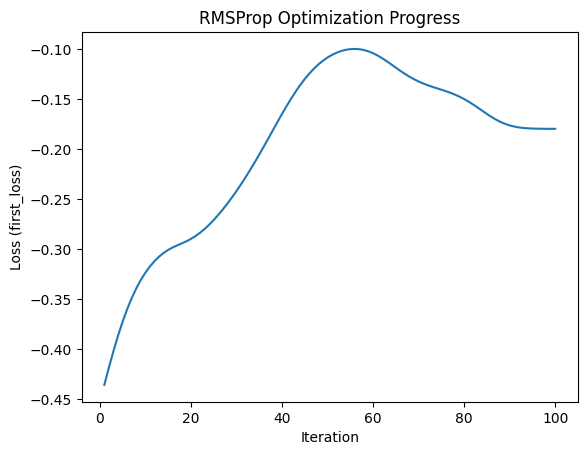

0.6617055062548469 0.41027292873924137


In [107]:
def rmsprop(X_train, y_train, lr=0.01, epochs=100, beta=0.9, epsilon=1e-8):
    # Random initialization of weights from a normal distribution
    w_1 = np.random.rand()
    w_2 = np.random.rand()

    # Initialize moving averages of squared gradients for both weights
    E_grad_squared1 = 0
    E_grad_squared2 = 0

    iteration, loss1 = [], []
    iter = 0

    for epoch in range(epochs):
        iter += 1

        #  Compute gradients for the current step 
        g1 = gradian1_first(X_train, y_train, w_1, w_2)
        g2 = gradian2_first(X_train, y_train, w_1, w_2)

        #  Update running averages of squared gradients 
        E_grad_squared1 = beta * E_grad_squared1 + (1 - beta) * (g1 ** 2)
        E_grad_squared2 = beta * E_grad_squared2 + (1 - beta) * (g2 ** 2)

        # Update weights using RMSProp formula 
        w_1 -= lr * g1 / (np.sqrt(E_grad_squared1) + epsilon)
        w_2 -= lr * g2 / (np.sqrt(E_grad_squared2) + epsilon)

        # Track progress
        iteration.append(iter)
        loss1.append(first_loss(X_train, y_train, w_1, w_2))

    return loss1, iteration, (w_1, w_2)

# Run the RMSProp optimizer
B = rmsprop(X_train, y_train)

# Display final learned weights
print("Final weights (w_1, w_2):", B[2])

# Display iterations (for plotting)
print("Iterations:", B[1])

# Plot loss trajectory
plt.plot(B[1], B[0])
plt.xlabel("Iteration")
plt.ylabel("Loss (first_loss)")
plt.title("RMSProp Optimization Progress")
plt.show()

print(w_1, w_2)  


Final weights (w_1, w_2): (np.float64(1.018217633687633), np.float64(0.36675356332967285))
Iterations: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

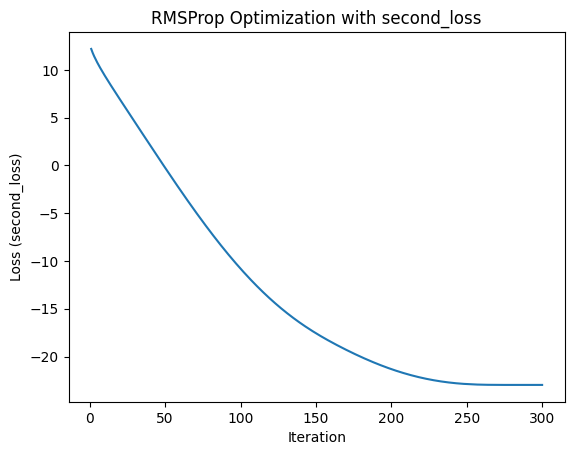

0.6617055062548469 0.41027292873924137


In [111]:
def rmsprop(X_train, y_train, lr=0.001, epochs=300, beta=0.9, epsilon=1e-8):
    # Randomly initialize weights
    w_1 = np.random.rand()
    w_2 = np.random.rand()

    # Initialize moving averages of squared gradients
    E_grad_squared1 = 0
    E_grad_squared2 = 0

    iteration, loss1 = [], []
    iter = 0

    for epoch in range(epochs):
            iter += 1

            # --- Compute gradients for second_loss ---
            g1 = gradian1_second(X_train, y_train, w_1, w_2)
            g2 = gradian2_second(X_train, y_train, w_1, w_2)

            # --- Update moving averages of squared gradients ---
            E_grad_squared1 = beta * E_grad_squared1 + (1 - beta) * (g1 ** 2)
            E_grad_squared2 = beta * E_grad_squared2 + (1 - beta) * (g2 ** 2)

            # --- Update weights using RMSProp rule ---
            w_1 -= lr * g1 / (np.sqrt(E_grad_squared1) + epsilon)
            w_2 -= lr * g2 / (np.sqrt(E_grad_squared2) + epsilon)

            # Track iteration and loss
            iteration.append(iter)
            loss1.append(second_loss(X_train, y_train, w_1, w_2))

    return loss1, iteration, (w_1, w_2)

# Run optimizer
B = rmsprop(X_train, y_train)

# Display final weights
print("Final weights (w_1, w_2):", B[2])

# Display iteration history
print("Iterations:", B[1])

# Plot loss curve
plt.plot(B[1], B[0])
plt.xlabel("Iteration")
plt.ylabel("Loss (second_loss)")
plt.title("RMSProp Optimization with second_loss")
plt.show()

print(w_1, w_2)
